In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow OR pip intsall tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'3.5.0'

In [4]:
tf.__version__


'2.17.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

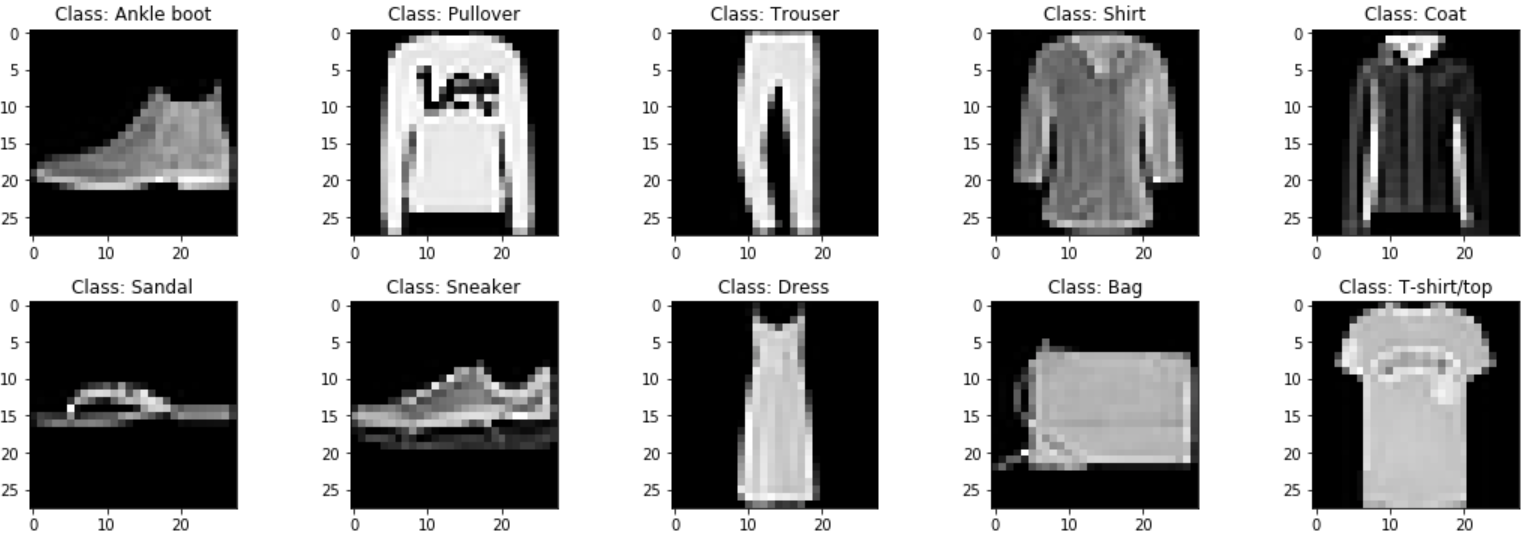

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

This Dataset 70,000 images which are stored in 28*28 pixels array, each pixel store value of rgb

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


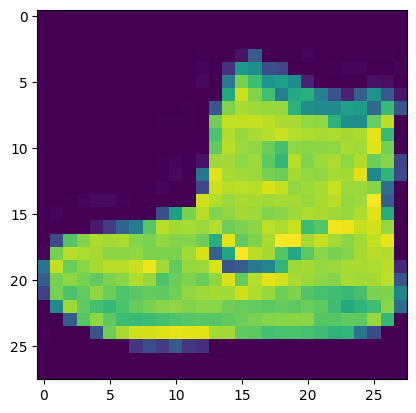

In [9]:
plt.imshow(X_train_full[0]) #change index to see image located at index

In [10]:
y_train_full[0]

9

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train_full[0]]

'Ankle boot'

In [15]:
X_train_full[10]  #image located at index 10

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

# Data normalization
We then normalize the data dimensions so that they are of approximately the same scale. i.e. bwtween 0 and 1

In [17]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0  #divide with floating number so that we get final answer in decimals

# Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [18]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [20]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](https://miro.medium.com/max/567/1*ytBUCmhkAucJ5imsNfAyfQ.png "Title")

![](https://i.ytimg.com/vi/ittokQvuNg8/maxresdefault.jpg "Title")

# Sequencial model

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

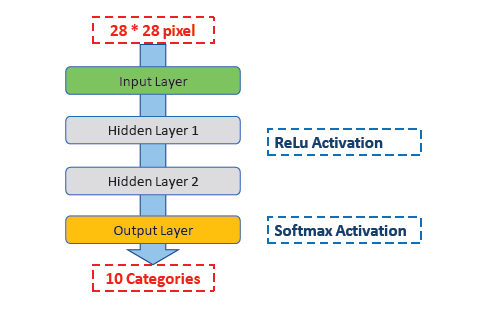

What are we doing actually?
-
We are first converting our 2d observations into a flat 1d observations.

So instead of a 2d array of 28 into 28 pix, 

We want 784 pixel in our input layer.

Then we are going to create two hidden layers.

The activation function, which we are going to use for hidden layers, will.

And in the output since this 10 categories are exclusive.

and this is a classification mod, 

We will be using softmax activation. be relu

In [25]:
model = keras.models.Sequential()  # create model
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # adding input layer
model.add(keras.layers.Dense(300, activation="relu"))  # add first dense layer, 300 is the number of nurons we want in this layer
model.add(keras.layers.Dense(100, activation="relu"))  # add second layer
model.add(keras.layers.Dense(10, activation="softmax"))  #add output layer

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Lets understand dense layer
> we have 784 inputs which are connected to 300 nurons hence

> 784 inputs * 300 nurons = total connections i.e. total weights required

> bias varible for each nuron = 300 bias vaiables

> total params for dense layer = weights+bias values = 784*300+300=235,500

> same for dense_1 = 300*100+100 = 30,100

> dense_2 = 100*10+10 = 1,010 

In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


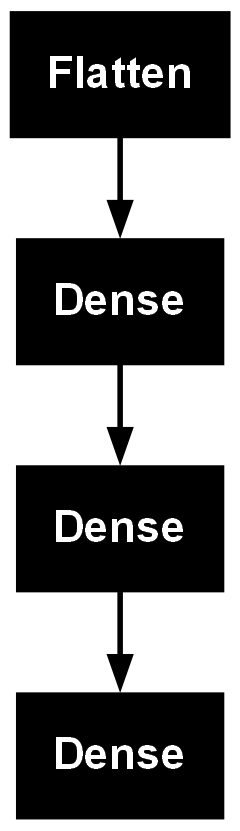

In [29]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [30]:
weights, biases = model.layers[1].get_weights() # weights and biase for 2nd layer

In [31]:
weights

array([[ 0.0201725 ,  0.06773031, -0.0011738 , ...,  0.05009814,
         0.02617539,  0.06747781],
       [ 0.03310568,  0.00158917,  0.06930684, ..., -0.01236131,
        -0.06792064,  0.04004874],
       [-0.00538573, -0.00758806, -0.05443146, ...,  0.01997864,
        -0.04329097, -0.06618151],
       ...,
       [ 0.0326489 , -0.00740128, -0.06403951, ...,  0.03261773,
         0.04879371,  0.014418  ],
       [-0.01009878, -0.00302266,  0.04866545, ..., -0.0387615 ,
         0.04276785,  0.05833188],
       [ 0.03270367, -0.00293604,  0.01395974, ...,  0.05026218,
         0.07324004,  0.03402383]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

# Compiling and Training Neural Network model

Documentation - https://keras.io/models/sequential/

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6876 - loss: 0.9975 - val_accuracy: 0.8238 - val_loss: 0.5192
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8248 - loss: 0.5008 - val_accuracy: 0.8430 - val_loss: 0.4573
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8406 - loss: 0.4494 - val_accuracy: 0.8536 - val_loss: 0.4243
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8519 - loss: 0.4203 - val_accuracy: 0.8576 - val_loss: 0.4031
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.3991 - val_accuracy: 0.8600 - val_loss: 0.3887
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.3825 - val_accuracy: 0.8624 - val_loss: 0.3765
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.3685 - val_accuracy: 0.8684 - val_loss: 0.3648
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8727 - loss: 0.3565 - 

In [37]:
model_history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [38]:
model_history.history

{'accuracy': [0.7661091089248657,
  0.8293454647064209,
  0.843254566192627,
  0.8529999852180481,
  0.860909104347229,
  0.8654909133911133,
  0.8702181577682495,
  0.8736181855201721,
  0.8772363662719727,
  0.8803636431694031,
  0.8828908801078796,
  0.8851636648178101,
  0.8877999782562256,
  0.8899999856948853,
  0.8924727439880371,
  0.8949272632598877,
  0.8967272639274597,
  0.8986181616783142,
  0.9004908800125122,
  0.9027454257011414,
  0.9045090675354004,
  0.9064000248908997,
  0.9082000255584717,
  0.90989089012146,
  0.9111818075180054,
  0.9126181602478027,
  0.9140727519989014,
  0.9157454371452332,
  0.9172000288963318,
  0.9190545678138733],
 'loss': [0.7171906232833862,
  0.4878023564815521,
  0.444172739982605,
  0.4173351526260376,
  0.39729854464530945,
  0.3812268376350403,
  0.3674588203430176,
  0.35569193959236145,
  0.3454172611236572,
  0.3360317349433899,
  0.3274170756340027,
  0.3195011019706726,
  0.3122485876083374,
  0.30550554394721985,
  0.299100697

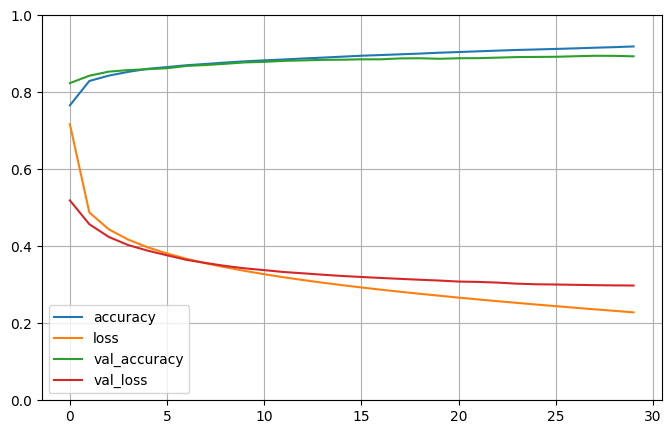

In [39]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating performance and Prediction

In [40]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8783 - loss: 0.3491


[0.3429902493953705, 0.8787000179290771]

In [41]:
X_new = X_test[:3]

In [43]:
y_proba = model.predict(X_new)  #calculate probability score assigned to each class
y_proba.round(2)   # roundoff values to 2 deciaml places

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
#Convert probabilities to class labels
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(size=(28, 28))


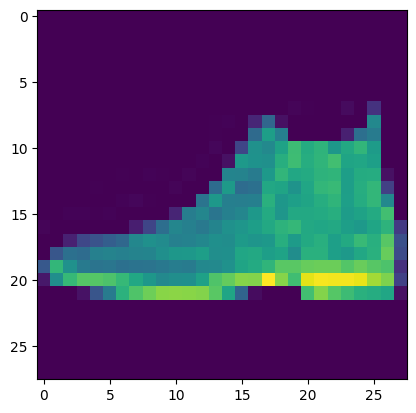

In [50]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


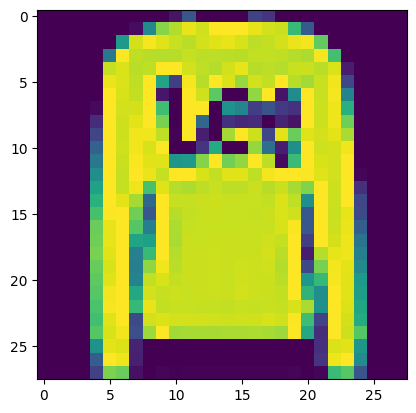

In [51]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


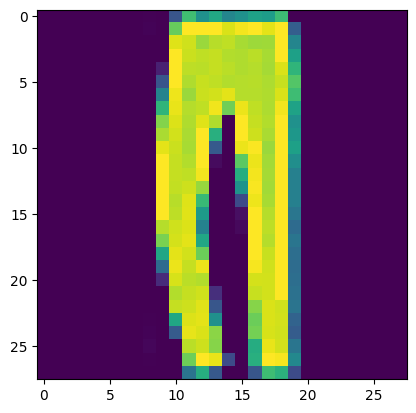

In [52]:
print(plt.imshow(X_test[2]))